**PARSING A FASTQ AND COMPUTING QUALITY STATISTICS**

**check_fastq.ipynb** 
download fastq from aula.esci.upf (inside reads/unknown_illumina_2024.fastq)


1. Use SeqIO.parse to print the first record in the fastq

2. What's the read length?

3. How many reads are stored in this file?

4. Can you print the quality score? (check https://biopython.org/wiki/SeqRecord)

5. Plot the mean quality at every position in the reads: start with mean quality at position 1 across all reads, then at position 2, and so on until N (that is the length of the reads).

6. Show lines with the mean quality score and the 95% conficence interval (2 s.d.)  

7. Convert the qualities to error probabilities using the Phred Quality Score equations. Plot them, at which positions is higher? what's the expected error rate of them?

8. Practical Assessment: Identify the reads origin. (How would you find out from which genome come these reads? To which species they belong? Please describe the method used and the reliability of the results)


Consulting materials:
https://en.wikipedia.org/wiki/FASTQ_format

https://biopython.org/wiki/SeqIO

https://biopython.org/wiki/SeqRecord

In [1]:
from Bio import SeqIO

In [8]:

first_recordrecord = list(SeqIO.parse('unknown_illumina_2024.fastq', "fastq"))
print (first_recordrecord[0])

ID: A00500:270:H7YGVDSX2:1:1101:3224:1000
Name: A00500:270:H7YGVDSX2:1:1101:3224:1000
Description: A00500:270:H7YGVDSX2:1:1101:3224:1000 1:N:0:TAAGTATG
Number of features: 0
Per letter annotation for: phred_quality
Seq('NGAATCCGTGACATCTATTTGGTGTGTGTGTTCATGATGTTACTGGAGCAGTTA...AAA')


In [11]:
# 2 Read length
print(len(first_recordrecord[0]))

151


In [12]:
print(len(first_recordrecord))


10000


In [19]:
print(first_recordrecord[0].letter_annotations)

{'phred_quality': [2, 37, 37, 37, 37, 37, 37, 37, 37, 37, 37, 37, 37, 37, 37, 37, 37, 37, 37, 37, 37, 37, 37, 37, 37, 37, 37, 37, 37, 37, 37, 37, 37, 37, 37, 37, 37, 37, 37, 37, 37, 37, 37, 37, 37, 37, 37, 37, 37, 37, 37, 37, 37, 37, 37, 37, 37, 37, 37, 37, 37, 37, 37, 37, 37, 37, 37, 37, 37, 37, 37, 37, 37, 37, 37, 37, 37, 37, 37, 37, 37, 37, 37, 37, 37, 37, 37, 37, 37, 37, 37, 37, 37, 37, 37, 37, 37, 37, 37, 37, 37, 37, 37, 37, 37, 37, 37, 37, 37, 37, 37, 37, 37, 37, 37, 37, 37, 37, 37, 37, 37, 37, 37, 37, 37, 37, 37, 25, 37, 37, 37, 37, 37, 37, 37, 37, 37, 37, 37, 37, 37, 37, 37, 37, 11, 37, 37, 37, 37, 37, 37]}


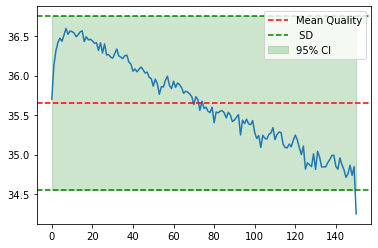

In [36]:
import matplotlib.pyplot as plt
import numpy as np

lengt_vals =[]

for read in SeqIO.parse('unknown_illumina_2024.fastq', "fastq"):
    lengt_vals.append(len(read.seq))
    


suma = [0 for x in range(151)]
for x in range(len(first_recordrecord)):
    list = [num for num in first_recordrecord[x].letter_annotations["phred_quality"]]
    for pos in range(151):
        suma[pos] += list[pos]/10000
plt.plot(suma)

mean = np.mean(suma)
sd = np.std(suma)

plt.axhline(y = mean, color = "r", linestyle = "--", label = "Mean Quality")
ci = 1.96*sd
plt.axhline(y =mean- ci, color = "g", linestyle = "--", label = " SD")
plt.axhline(y =mean+ ci, color = "g", linestyle = "--")
plt.fill_between(range(151), mean - ci, mean + ci, color = "g", alpha = 0.2, label = "95% CI")

plt.legend()
plt.show()



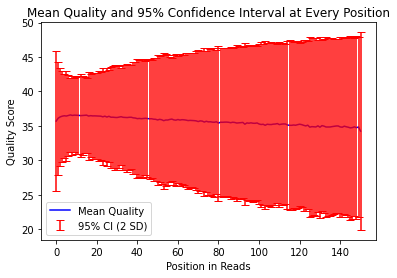

In [31]:

# Calculate mean and standard deviation for each position
mean_quality_at_positions = np.zeros(151)
std_dev_at_positions = np.zeros(151)

for read in first_recordrecord:
    for pos in range(151):
        mean_quality_at_positions[pos] += read.letter_annotations["phred_quality"][pos]

mean_quality_at_positions /= len(first_recordrecord)

for read in first_recordrecord:
    for pos in range(151):
        std_dev_at_positions[pos] += (read.letter_annotations["phred_quality"][pos] - mean_quality_at_positions[pos]) ** 2

std_dev_at_positions = np.sqrt(std_dev_at_positions / len(first_recordrecord))

# Plot mean quality at each position with 95% confidence interval
plt.plot(mean_quality_at_positions, label='Mean Quality', color='blue')
plt.errorbar(range(151), mean_quality_at_positions, yerr=2 * std_dev_at_positions, fmt='none', color='red', capsize=4, label='95% CI (2 SD)')
plt.title('Mean Quality and 95% Confidence Interval at Every Position')
plt.xlabel('Position in Reads')
plt.ylabel('Quality Score')
plt.legend()
plt.show()


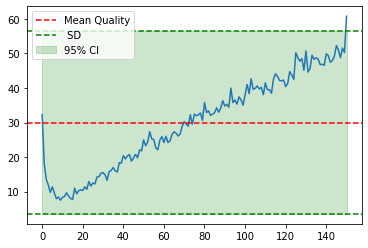

In [40]:
import matplotlib.pyplot as plt
import numpy as np

lengt_vals =[]

for read in SeqIO.parse('unknown_illumina_2024.fastq', "fastq"):
    lengt_vals.append(len(read.seq))
    


suma = [0 for x in range(151)]
for x in range(len(first_recordrecord)):
    list = [num for num in first_recordrecord[x].letter_annotations["phred_quality"]]
    for pos in range(151):
        suma[pos] += 10**(list[pos]/-10)
plt.plot(suma)
mean = np.mean(suma)
sd = np.std(suma)

plt.axhline(y = mean, color = "r", linestyle = "--", label = "Mean Quality")
ci = 1.96*sd
plt.axhline(y =mean- ci, color = "g", linestyle = "--", label = " SD")
plt.axhline(y =mean+ ci, color = "g", linestyle = "--")
plt.fill_between(range(151), mean - ci, mean + ci, color = "g", alpha = 0.2, label = "95% CI")

plt.legend()
plt.show()

